# PCA_Exp tutorial

This tutorial teaches how to use, and explains basic functionality of pca_exp package. The main task of pca_exp is to take a set of different experimental measurements, preprocess them, perform principal component analysis (PCA) and present the result in a user friendly format. Let's start from the quick explanation of PCA and why it is useful in analysis of experimental data.

## PCA 

Let's suppose that our experimental measurements look as follows:

![title](figure/Figure_1.png)

The data in this tutorial are synthetic, but for concreteness we may imagine that each curve $y(x)$ represents a a moun asymmetry function obtained for the a given material. In this intepretation, the $y$ coordinate is the asymmetry function $A(t)$ obtained at some particular time $t$ given by the $x$ coordinate. The parameter $T$ that distinguishes the different curves could represents the temperature of the material when a particular measurement of $A(t)$ was taken. There is a subtle change of behaviour at some value of $T$, but we are not exactly sure where. Principal component analysis will allow us to find the most common deviations from the average of these curves (presented as a dashed line), called principal components (PC). By looking at the projections of experimental measurements onto different PCs, and how those projections differ with parameter $T$, we will be able to better understand the transition seen on figure above.

First, we should import required modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pca_exp.data_handler import DataHandler
from pca_exp.pca_machine import PCAMachine

We imported two important classes: "DataHandler" loads, stores and preprocess the experimental measurement data, and "PCAMachine" is responsible for performing PCA and showing the results.

The data on figure 1 should be in your working directory in the folder "exp_data_example". Each textfile in that folder correspond to different measurement and it has folowing format (in textfiles there are no headers):

|X|Y|ErrorY|
|---|---|---|
|$x_1$|$y_1$|$ey_1$|
|$x_2$|$y_2$|$ey_2$|
|...|...|...|
|$x_N$|$y_N$|$ey_N$|



"DataHandler" class can be used to load the textfiles if they are in similar format as the above. First, let's create instance of the class:

In [2]:
dh = DataHandler()

The class stores the data in its member "batches". To load all the data from "exp_data_example" folder we need to define few parameters:

In [3]:
loc = './exp_data_example/'            # loc specifies the location of textfiles

prenum = 'ede'                         # the class assumes that names of the textfiles in the folder 
stsp = (0, 10)                         # have form "prenum(NUM)ext" where NUM runs through integer numbers
ext = '.txt'                           # from stsp[0] to stsp[1].

There are some additional options to consider loading the files (changing delimiter, skiping first rows etc.) but this is enough for this tutorial (for more options check data_handler.py). Loading the files require only one call: 

In [4]:
dh.load_batch(stsp=stsp, loc=loc, prenum=prenum, ext=ext)

We can check that we loaded files properly by displaying them directly:

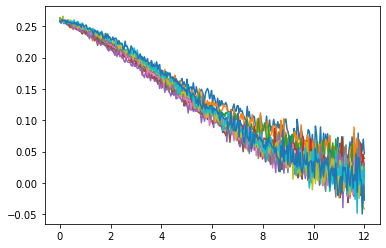

In [5]:
plt.figure(1)
plt.plot(dh.batches[0][:,:,0], dh.batches[0][:,:,1])
plt.show()

Looking at the curves above, we can see that the error seem to grow at later times. Useful tool in preprocessing such data is to re-bin the x-windows, so that each new bin captures approximately the same amount of standard deviation. This is done automatically by invoking "prepare_XYE_PCA" function.

In [6]:
dh.prepare_XYE_PCA()

The function also prepares all the Y values in the matrix form such as:
$$
 \mathbf{Y} = \begin{bmatrix}
y_1(T_1) & y_1(T_2) & ... & y_1(T_M) \\
y_2(T_1) & y_2(T_2) & ... & y_2(T_M) \\
\vdots & \vdots & \ddots & \vdots \\
y_{N'}(T_1) & y_{N'}(T_2) & ... & y_{N'}(T_M) \\
\end{bmatrix}
$$
which is necessery for PCA ($N' \leq N$ because of re-binning)

Let's create instance of "PCAMachine" that will perfom principal component analysis. We need to specify the DataHandler which holds the data.

In [7]:
pca_machine = PCAMachine(dh)

Principal component analysis consist of few steps:
1. Substracting the average of $\mathbf{Y}$ along the $T$ parameter. Namely we create new matrix $\mathbf{Z}$, defined as
$$
[\mathbf{Z}]_{ij} = y_i(T_j) - \sum_k^M y_i(T_k).
$$
2. Performing singular value decomposition on $\mathbf{Z}$. That is we find such matrices $\mathbf{U}$, $\mathbf{V}$ and diagonal matrix $\mathbf{L}$ that
$$
\mathbf{Z} = \mathbf{U} \mathbf{L} \mathbf{V}.
$$
The columns of $\mathbf{U}$ matrix are principal components of $\mathbf{Z}$. They are the same length as the columns of $\mathbf{Y}$ and represent most common deviation from the average of all measurements. For each PC there is a singular value, which is written in diagonal $\mathbf{L}$ matrix. It correspond to covariance captured by principal component. PCs with highest singular values are most important and from them we can learn correlation between measurement curves.
3. Last important values are principal component scores, which are projections of measurement curves onto principal components:
$$
\mathbf{Scores} = \mathbf{U}^T \mathbf{Z}.
$$

All of the above steps are performed by single call of "PCAMachine":

In [8]:
pca_machine.perform_pca()

Performing PCA on prepared data
Showing the percentage of covariance of most important PCs:
37% ^
    |	#	 	 	 	 	 	 	 	
    |	#	 	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	 	 	 	 	 	 	
    |	#	#	#	#	#	#	 	 	
    ----------------------------------------------------------------->


All the results are stored as members of pca_machine: 

In [9]:
Z = pca_machine.pc_z[0]
U = pca_machine.pc_curves[0]
L = pca_machine.pc_sing[0]
Scores = pca_machine.pc_scores[0]

We could use pyplot to plot the results but there is also built-in option in pca_machine to do so, we should also specify the range of T parameter:

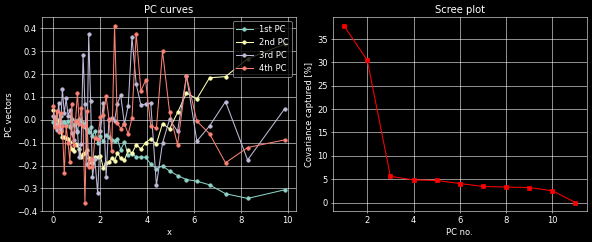

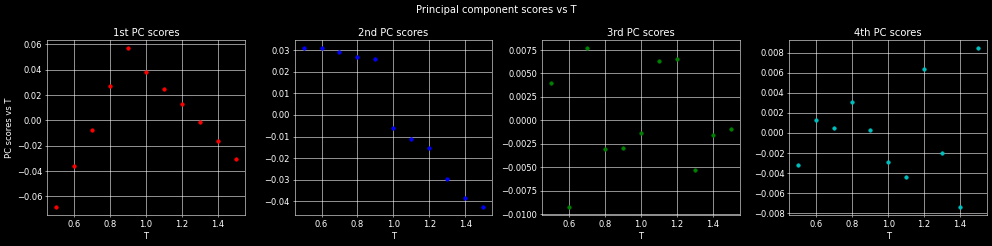

In [10]:
T = [0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4, 1.5]
pca_machine.show_pca_results_1(param1=T, param1_name='T')

Now we can see the results. Looking at scree plots (which are singular values of principal components), we can see how many PCs are important to our analysis. In this case it seems that two first PCs are the most important ones.

Perhaps the most relevant information lies in PC scores vs T parameter plots, from which we can learn at which T there is visible change in behaviour of experimental curves. Clearly, from two first PCs (which are the most important) we see that something must be happening between $T=0.9$ and $T=1$